how do we solve this maze to get from e to g?

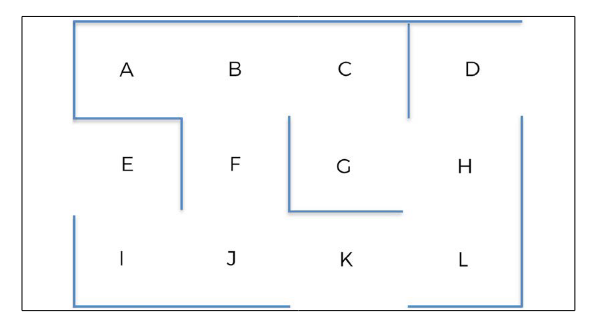

In [1]:
import numpy as np

In [2]:
gamma = 0.99
alpha = 0.05

In [3]:
# Defining the states
location_to_state = {'A': 0,
'B': 1,
'C': 2,
'D': 3,
'E': 4,
'F': 5,
'G': 6,
'H': 7,
'I': 8,
'J': 9,
'K': 10,
'L': 11}

In [4]:
# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

In [5]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0],
[0,0,1,0,0,0,1000,1,0,0,0,0],
[0,0,0,1,0,0,1,0,0,0,0,1],
[0,0,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,1,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,1,0,0,1,0]])

In [6]:
# Initializing the Q-values
Q = np.array(np.zeros([12,12]))

In [7]:
# Implementing the Q-Learning process
for i in range(1000):
    current_state = np.random.randint(0,12)
    playable_actions = []
    for j in range(12):
        if R[current_state, j] > 0:
            playable_actions.append(j)
    next_state = np.random.choice(playable_actions)
    TD = R[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        
    Q[current_state, next_state] = Q[current_state, next_state] +  alpha * TD
    

In [8]:
print("Q-values:")
print(Q.astype(int))

Q-values:
[[   0  107    0    0    0    0    0    0    0    0    0    0]
 [  23    0  165    0    0   22    0    0    0    0    0    0]
 [   0   75    0    0    0    0  669    0    0    0    0    0]
 [   0    0    0    0    0    0    0  277    0    0    0    0]
 [   0    0    0    0    0    0    0    0    4    0    0    0]
 [   0   86    0    0    0    0    0    0    0    8    0    0]
 [   0    0  262    0    0    0 1193  127    0    0    0    0]
 [   0    0    0  102    0    0  471    0    0    0    0   57]
 [   0    0    0    0    2    0    0    0    0    6    0    0]
 [   0    0    0    0    0   20    0    0    3    0   13    0]
 [   0    0    0    0    0    0    0    0    0    6    0   77]
 [   0    0    0    0    0    0    0  198    0    0   27    0]]


In [9]:
# Making a mapping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}

In [10]:
# Making the final function that will return the optimal route
def route(starting_location, ending_location):
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route

In [11]:
# Printing the final route
print('Route:')
route('E', 'G')

Route:


['E', 'I', 'J', 'F', 'B', 'C', 'G']

In [12]:
# Printing the final route
print('Route:')
route('D', 'G')

Route:


['D', 'H', 'G']

In [13]:
# Printing the final route
print('Route:')
route('K', 'G')

Route:


['K', 'L', 'H', 'G']

# technically

the above is more dynamic programming as we have a ton of information regarding the environment here to iterate thru

this also only gets us to g reliably

how do we solve any route we want to take given a start and stop point given?

we need to define the reward matrix without specifying 1000 for g which represents a terminal/absorbing state

In [14]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0],
[0,0,1,0,0,0,1,1,0,0,0,0],
[0,0,0,1,0,0,1,0,0,0,0,1],
[0,0,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,1,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,1,0,0,1,0]])

In [15]:
# Making the final function that will return the optimal route
def route(starting_location, ending_location, R):
    ending_state = location_to_state[ending_location]
    R[ending_state, ending_state] = 1000
    Q = np.array(np.zeros([12,12]))
    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        for j in range(12):
            if R[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]

        Q[current_state, next_state] = Q[current_state, next_state] +  alpha * TD
        
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route    

In [16]:
route('E','D',R.copy())

['E', 'I', 'J', 'K', 'L', 'H', 'D']

In [17]:
route('G','D',R.copy())

['G', 'H', 'D']

What about multiple locations?

reuse the above and iterate thru the pairs

In [27]:
def multi_stops(stop_list, R):
    list_len = len(stop_list)
    if list_len == 1:
        return stop_list
    elif list_len == 2:
        return route(stop_list[0], stop_list[1], R)
    else:
        return_list = []
        for i in range(list_len - 1):
            if i == 0:
                return_list += route(stop_list[0+i], stop_list[1+i], R.copy())
            else:
                return_list += route(stop_list[0+i], stop_list[1+i], R.copy())[1:]
                
    return return_list

In [28]:
multi_stops(['E','G','D'], R.copy())

['E', 'I', 'J', 'K', 'L', 'H', 'G', 'H', 'D']

In [29]:
multi_stops(['E','B','K','G','D'], R.copy())

['E', 'I', 'J', 'F', 'B', 'F', 'J', 'K', 'L', 'H', 'G', 'H', 'D']